https://aprendepython.es/pypi/scraping/beautifulsoup/

In [ ]:
from bs4 import BeautifulSoup

contents = '''
<html lang="en">
<head>
    <title>Just testing</title>
</head>
<body>
    <h1>Just testing</h1>
    <div class="block">
      <h2>Some links</h2>
      <p>Hi there!</p>
      <ul id="data">
        <li class="blue"><a href="https://example1.com">Example 1</a></li>
        <li class="red"><a href="https://example2.com">Example 2</a></li>
        <li class="gold"><a href="https://example3.com">Example 3</a></li>
      </ul>
    </div>
    <div class="block">
      <h2>Formulario</h2>
      <form action="" method="post">
        <label for="POST-name">Nombre:</label>
        <input id="POST-name" type="text" name="name">
        <input type="submit" value="Save">
      </form>
    </div>
    <div class="footer">
      This is the footer
      <span class="inline"><p>This is span 1</p></span>
      <span class="inline"><p>This is span 2</p></span>
      <span class="inline"><p>This is span 2</p></span>
    </div>
</body>
</html>
'''

soup = BeautifulSoup(contents, features='html.parser')

### Localizar Elementos

In [ ]:
# Shortcut:  find_all('span')  -> soup('span')

# Etiqueta - Etiquetas
soup.find_all('a')                      # Array de Etiquetas <a>
soup.find_all(['input', 'span'])
soup.select('.footer p')                # Array - Usando Logica Css

# Atributos
soup.find_all(class_='inline')          # Array de Etiquetas con class especificas
soup.find_all(type='text')              # [<input id="POST-name" name="name" type="text"/>]

# Etiqueta + Atributo
soup.find_all('div', class_='footer')   # Busqueda con Precision

soup.find_all('h2', string='Formulario') # [<h2>Formulario</h2>]

In [ ]:
# Raros
soup.find_all(re.compile(r'^h\d+.*'))  # [<h1>Just testing</h1>, <h2>Some links</h2>, <h2>Formulario</h2>]

### Localizar Elemento

In [ ]:
""" Envia el Primero - Sino Existe entonces NONE """

# Etiqueta
soup.find('form')
soup.find('li')

# Etiqueta + Class
soup.find('li', 'gold')

# Etiqueta + Atributos
soup.find('ul', id='data')

# Extraccion -> Funcion a la Extraccion [ Precision ]
second_block = soup.find_all('div', 'block')[1]
second_block.find_all('h2')


### Funciones Familia  [Funciones]

In [ ]:
"""
    Array Padres Hasta  ->  find_parents() 
    Array Un Padre      ->  find_parent()
"""

gold = soup.find('li', 'gold')

gold.find_parents('div')
# [<div class="block">
#   <h2>Some links</h2>
#   <p>Hi there!</p>
#   <ul id="data">
#       <li class="blue"><a href="https://example1.com">Example 1</a></li>
#       <li class="red"><a href="https://example2.com">Example 2</a></li>
#       <li class="gold"><a href="https://example3.com">Example 3</a></li>
#   </ul>
#  </div>]

"""
    Array Hermanos NEXT -> find_next_siblings()
    Array Un Hermano    -> find_next_sibling() 
"""

blue_li = soup.find('li', 'blue')

blue_li.find_next_siblings()
# [<li class="red"><a href="https://example2.com">Example 2</a></li>,
# <li class="gold"><a href="https://example3.com">Example 3</a></li>]

"""
    Array Hermanos BACK ->  find_previous_siblings()
    Array Un Hermano    ->  find_previous_sibling()
"""
gold_li = soup.find('li', 'gold')

gold_li.find_previous_siblings()
# [<li class="red"><a href="https://example2.com">Example 2</a></li>,
# <li class="blue"><a href="https://example1.com">Example 1</a></li>]


""" Antes y Despues """
submit = soup.find('input', type='submit')
submit.find_all_next()
# find_next()

# [<div class="footer">
#  This is the footer
#  <span class="inline"><p>This is span 1</p></span>
#  <span class="inline"><p>This is span 2</p></span>
#  <span class="inline"><p>This is span 2</p></span>
#  </div>,
#  <span class="inline"><p>This is span 1</p></span>,
#  <p>This is span 1</p>,
#  <span class="inline"><p>This is span 2</p></span>,
#  <p>This is span 2</p>,
#  <span class="inline"><p>This is span 2</p></span>,
#  <p>This is span 2</p>]

ul_data = soup.find('ul', id='data')
ul_data.find_all_previous(['h1', 'h2']) #[<h2>Some links</h2>, <h1>Just testing</h1>]
# find_previous()

## Acceso a Contenido

In [ ]:

""" Funciones """

# 🌱 [HTML - Etiqueta]
elem = soup.find('ul', id='data')
elem.name                           # 'ul'

elem = soup.find('h1')
elem.name                           # 'h1'

# 🌱 [HTML - Atributos]
elem = soup.find('input', id='POST-name')

elem['id']      #'POST-name'
elem['name']    #'name'
elem['type']    #'text'


""" Visualizando """

print(elem)             # <input id="POST-name" name="name" type="text"/>
print(elem.attrs)       # {'id': 'POST-name', 'type': 'text', 'name': 'name'} # Atributo Python


# Es posible modificar el nombre de una etiqueta con una simple asignación.


In [ ]:
# 🌱 [Contenido de Texto]

footer = soup.find(class_='footer')

# Texto + Metaracteres
footer.text                         # '\n      This is the footer\n      This is span 1\nThis is span 2\nThis is span 2\n'

# Texto + Simple
footer.string                       # El "footer" contiene varios elementos
footer.span.string                  # El "span" sólo contiene un elemento       # 'This is span 1'


# Array + Metacaracteres
list(footer.strings)
# ['\n      This is the footer\n      ',
#  'This is span 1',
#  '\n',
#  'This is span 2',
#  '\n',
#  'This is span 2',
#  '\n']

# Array + !Metacaracteres
list(footer.stripped_strings)       # ['This is the footer', 'This is span 1', 'This is span 2', 'This is span 2']

### Navegar por el DOM [Atributos]

In [ ]:
""" Descendiente """

soup.div.p          # HTML              # <p>Hi there!</p>
soup.form.label     # HTML              # <label for="POST-name">Nombre:</label>
type(soup.span)     # bs4.element.Tag   # todos los elementos del DOM son de este tipo



""" Descendiente [.children] """
type(soup.form)             # bs4.element.Tag   # El DOM son de este tipo
type(soup.form.children)    # <list_iterator> [Secuencial] 

for elem in soup.form.children:
    print(repr(elem))

# '\n'
# <label for="POST-name">Nombre:</label>
# '\n'
# <input id="POST-name" name="name" type="text"/>
# '\n'
# <input type="submit" value="Save"/>
# '\n'

""" En resumen, block.contents es más limitado y solo muestra los elementos directos, mientras que list(block.descendants) muestra todos los elementos secundarios, incluyendo los anidados en cualquier nivel. """



""" Descendiente [.contents]"""
type(soup.form)             # bs4.element.Tag   # El DOM son de este tipo
type(soup.form.contents)    # List Array

soup.form.contents
# ['\n',
#  <label for="POST-name">Nombre:</label>,
#  '\n',
#  <input id="POST-name" name="name" type="text"/>,
#  '\n',
#  <input type="submit" value="Save"/>,
#  '\n']


""" Descendiente [.descendants]"""

block = soup.find_all('div')[1]

type(block.content)         # List Array
type(block.descendants)     # <Generator object>


# Mas Completo que [.contents]
# Vizualizar Diferencias

block.contents

# ['\n',
#  <h2>Formulario</h2>,
#  '\n',
#  <form action="" method="post">
#  <label for="POST-name">Nombre:</label>
#  <input id="POST-name" name="name" type="text"/>
#  <input type="submit" value="Save"/>
#  </form>,
#  '\n']

list(block.descendants) 

# ['\n',
#  <h2>Formulario</h2>,
#  'Formulario',
#  '\n',
#  <form action="" method="post">
#  <label for="POST-name">Nombre:</label>
#  <input id="POST-name" name="name" type="text"/>
#  <input type="submit" value="Save"/>
#  </form>,
#  '\n',
#  <label for="POST-name">Nombre:</label>,
#  'Nombre:',
#  '\n',
#  <input id="POST-name" name="name" type="text"/>,
#  '\n',
#  <input type="submit" value="Save"/>,
#  '\n',
#  '\n']

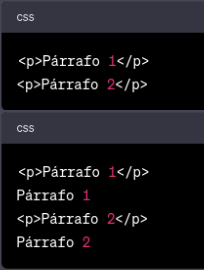

In [ ]:


""" Ascendente [.parents] """

li = soup.find('li', 'blue')

li.parent

# <ul id="data">
# <li class="blue"><a href="https://example1.com">Example 1</a></li>
# <li class="red"><a href="https://example2.com">Example 2</a></li>
# <li class="gold"><a href="https://example3.com">Example 3</a></li>
# </ul>

for elem in li.parents:
    print(elem.name)

# ul
# div
# body
# html
# [document]

### Html

In [ ]:
# Imprime en la consola de Forma mas Estetica
data = soup.find(id='data')
pretty_data = data.prettify()
print(pretty_data)